### Importar librerías necesarias

Se cargan todas las bibliotecas requeridas para el procesamiento de imágenes, visualización, manejo de datos y uso del modelo DeepForest.  
Incluye herramientas para trabajar con arrays (`numpy`), imágenes (`PIL`), gráficos (`matplotlib`) y detección de árboles (`deepforest`).


In [2]:
# Carga las librerias
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from deepforest import main
from deepforest import get_data
#from deepforest.visualize import plot_results
import numpy as np
import pandas as pd


### Cargar imagen y convertirla en un arreglo NumPy

Se carga una imagen de ejemplo provista por `DeepForest` y se convierte a un arreglo NumPy (`img_array`) para permitir su manipulación a nivel de píxeles y canales RGB.


array([[[183, 198, 128],
        [138, 163, 106],
        [153, 172, 113],
        ...,
        [153, 183, 102],
        [167, 177, 115],
        [161, 181, 128]],

       [[210, 227, 152],
        [198, 222, 139],
        [169, 188, 110],
        ...,
        [168, 180, 114],
        [138, 165, 102],
        [134, 145, 100]],

       [[185, 204, 132],
        [159, 173, 107],
        [124, 135,  76],
        ...,
        [194, 206, 137],
        [139, 155, 103],
        [136, 147,  90]],

       ...,

       [[212, 220, 172],
        [176, 180, 130],
        [186, 194, 144],
        ...,
        [139, 148, 104],
        [211, 243, 183],
        [134, 151, 109]],

       [[160, 168, 117],
        [159, 165, 111],
        [202, 203, 137],
        ...,
        [168, 194, 131],
        [229, 254, 174],
        [ 90,  90,  87]],

       [[156, 163, 112],
        [150, 162, 107],
        [179, 194, 122],
        ...,
        [154, 169, 130],
        [167, 174, 133],
        [123, 141, 108]]], dtype=uint8)
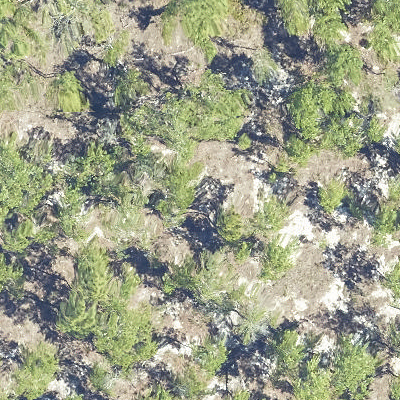

In [3]:
# Cargar imagen y convertir a numpy array
image_path = get_data("OSBS_029.png")
image = Image.open(image_path).convert("RGB")
img_array = np.array(image)
img_array

### Cargar el modelo preentrenado y generar predicciones

Se inicializa el modelo `DeepForest` y se carga una versión preentrenada desde Hugging Face.  
Luego, se utiliza para detectar árboles en la imagen cargada previamente, generando un conjunto de predicciones con coordenadas y niveles de confianza.

In [4]:
model = main.deepforest()
model.load_model(model_name="weecology/deepforest-tree", revision="main")
predictions = model.predict_image(path=image_path)

Reading config file: /usr/local/lib/python3.11/dist-packages/deepforest/data/deepforest_config.yml


Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth
100%|██████████| 130M/130M [00:01<00:00, 72.1MB/s]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

Reading config file: /usr/local/lib/python3.11/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


model.safetensors:   0%|          | 0.00/129M [00:00<?, ?B/s]

In [5]:
predictions.head()

,xmin,ymin,xmax,ymax,label,score,image_path,geometry
0,330.0,342.0,373.0,391.0,Tree,0.802979,OSBS_029.png,"POLYGON ((373 342, 373 391, 330 391, 330 342, ..."
1,216.0,206.0,248.0,242.0,Tree,0.778803,OSBS_029.png,"POLYGON ((248 206, 248 242, 216 242, 216 206, ..."
2,325.0,44.0,363.0,82.0,Tree,0.751573,OSBS_029.png,"POLYGON ((363 44, 363 82, 325 82, 325 44, 363 ..."
3,261.0,238.0,296.0,276.0,Tree,0.748605,OSBS_029.png,"POLYGON ((296 238, 296 276, 261 276, 261 238, ..."
4,173.0,0.0,229.0,33.0,Tree,0.738210,OSBS_029.png,"POLYGON ((229 0, 229 33, 173 33, 173 0, 229 0))"


### Visualizar la distribución de los niveles de confianza de las predicciones

Se genera un histograma que muestra cuántas predicciones fueron hechas con distintos niveles de confianza (`score`).  
Esto permite evaluar la calidad general de las detecciones realizadas por el modelo.

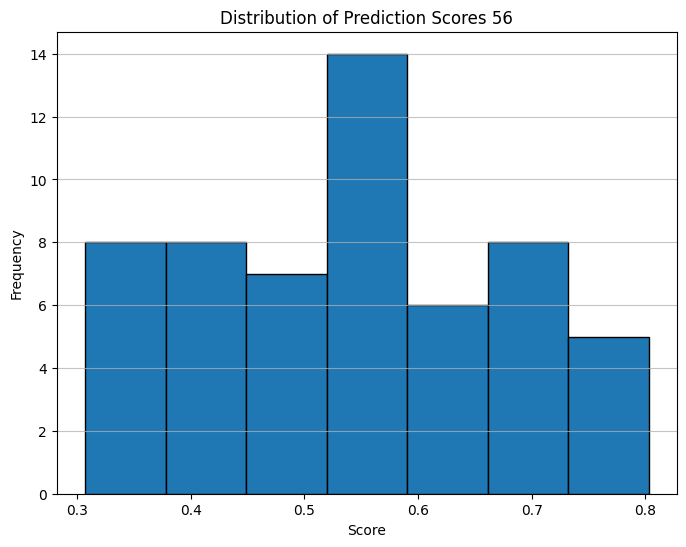

In [58]:
plt.figure(figsize=(8, 6))
plt.hist(predictions['score'], bins="sturges", edgecolor='black')
plt.title(f'Distribution of Prediction Scores {len(predictions)}')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Visualización de árboles detectados con identificadores

Se muestra la imagen original con las cajas de detección superpuestas para cada árbol identificado por el modelo.  
Cada caja está numerada con un identificador único.

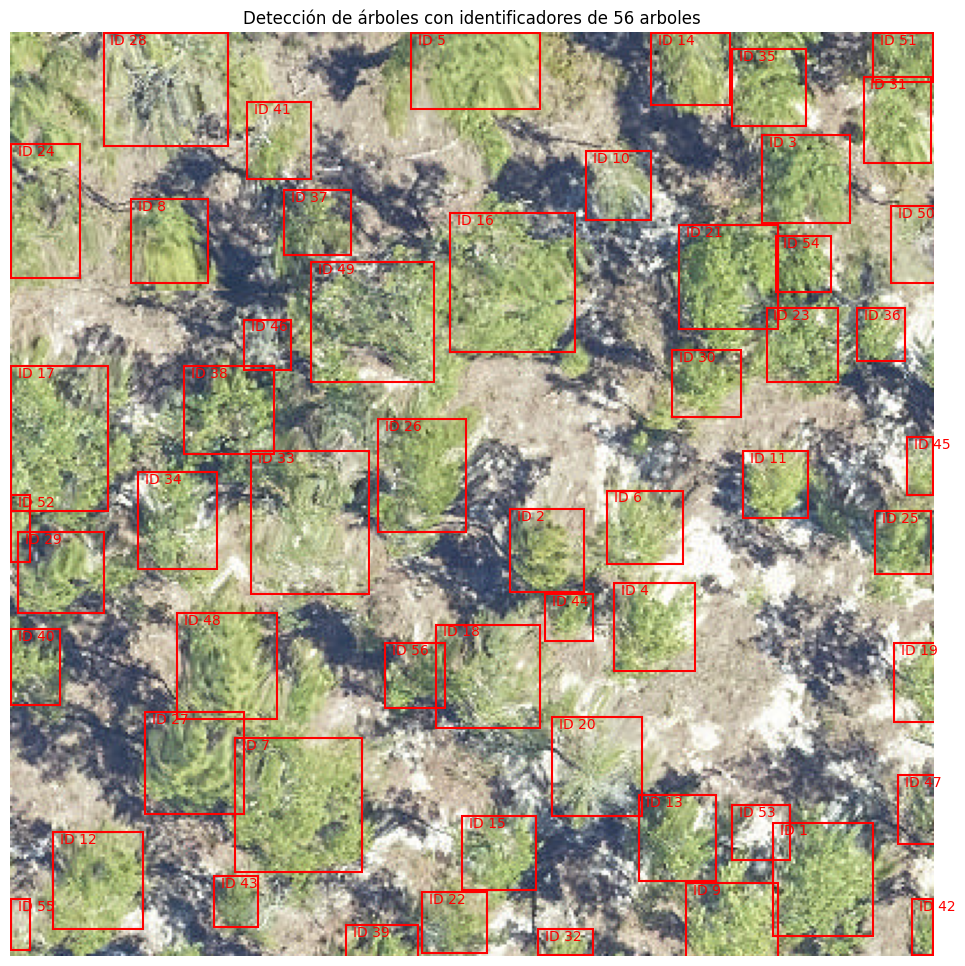

In [7]:
# Visualización con identificadores
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img_array)
# Dibujar las cajas de predicción
for idx, row in predictions.iterrows():
    idx = idx + 1
    xmin, ymin, xmax, ymax = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]
    width, height = xmax - xmin, ymax - ymin
    rect = patches.Rectangle((xmin, ymin), width, height,
                             linewidth=1.5, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.text(xmin+3, ymin+5, f"ID {idx}", color='red', fontsize=10)

plt.axis('off')
plt.title(f"Detección de árboles con identificadores de {len(predictions)} arboles")
plt.show()


### Asignar identificadores y calcular el área de cada árbol detectado

Se asigna un ID único a cada árbol detectado y se calcula su área (en píxeles) a partir de las coordenadas de la caja delimitadora.  
Luego, se construye un DataFrame (`df_arboles`) con las columnas esenciales para uso posterior.

In [40]:
# Agregar ID y calcular área
predictions = predictions.copy()
predictions["id_arbol"] = predictions.index+1
predictions["area_px"] = (predictions["xmax"] - predictions["xmin"]) * (predictions["ymax"] - predictions["ymin"])
# Crear DataFrame con columnas deseadas
df_arboles = predictions[["id_arbol", "xmin", "ymin", "xmax", "ymax", "area_px"]].copy()
df_arboles.head()

,id_arbol,xmin,ymin,xmax,ymax,area_px
0,1,330.0,342.0,373.0,391.0,2107.0
1,2,216.0,206.0,248.0,242.0,1152.0
2,3,325.0,44.0,363.0,82.0,1444.0
3,4,261.0,238.0,296.0,276.0,1330.0
4,5,173.0,0.0,229.0,33.0,1848.0


### Calcular índices de vegetación por árbol: ExG y VARI

Se calculan dos índices espectrales por cada árbol detectado:
- **ExG (Excess Green)** .
- **VARI (Visible Atmospherically Resistant Index)** .

Luego, se calcula el valor medio de cada índice dentro de la región de cada árbol y se agregan al DataFrame.


In [51]:
epsilon = 1e-6
ExG_means = []
VARI_means = []

R = img_array[:, :, 0]
G = img_array[:, :, 1]
B = img_array[:, :, 2]

for _, row in df_arboles.iterrows():
    xmin, ymin, xmax, ymax = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
    region = img_array[ymin:ymax, xmin:xmax]


    ExG = 2 * G - R - B
    VARI = (G - R) / (G + R - B + epsilon)

    ExG_means.append(ExG.mean())
    VARI_means.append(VARI.mean())

# Agregar al DataFrame
df_arboles["ExG_mean"] = ExG_means
df_arboles["VARI_mean"] = VARI_means
df_arboles.head()

,id_arbol,xmin,ymin,xmax,ymax,area_px,ExG_mean,VARI_mean,R_mean,G_mean,B_mean,R,G,B
0,1,330.0,342.0,373.0,391.0,2107.0,77.225725,536114.340275,154.977693,169.006645,125.853821,154.977693,169.006645,125.853821
1,2,216.0,206.0,248.0,242.0,1152.0,77.225725,536114.340275,151.463542,157.031250,123.578125,151.463542,157.031250,123.578125
2,3,325.0,44.0,363.0,82.0,1444.0,77.225725,536114.340275,146.706371,161.033241,115.914127,146.706371,161.033241,115.914127
3,4,261.0,238.0,296.0,276.0,1330.0,77.225725,536114.340275,180.204511,188.522556,144.969925,180.204511,188.522556,144.969925
4,5,173.0,0.0,229.0,33.0,1848.0,77.225725,536114.340275,170.638528,181.005411,125.125541,170.638528,181.005411,125.125541


### Comparar histogramas RGB entre píxeles de árboles y no árboles

Se construye una máscara para separar los píxeles que pertenecen a las cajas de los árboles detectados.  
Luego, se generan histogramas de intensidad para cada canal (R, G, B), comparando la distribución entre regiones de árboles y fondo.  

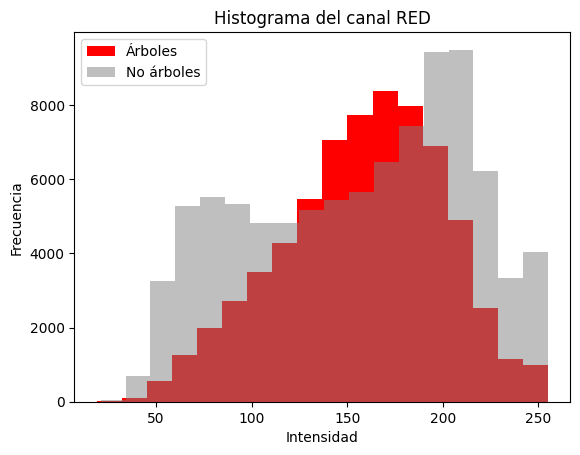

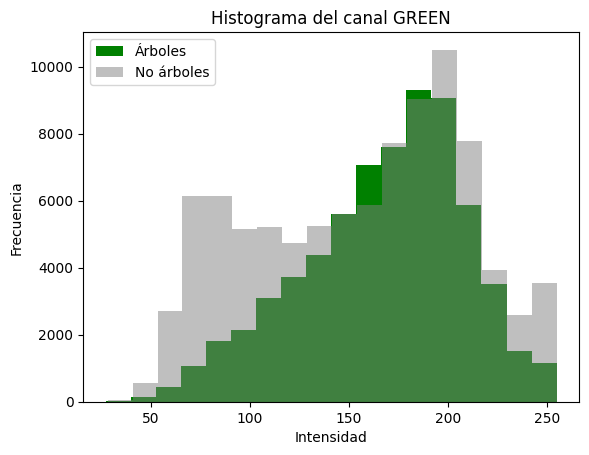

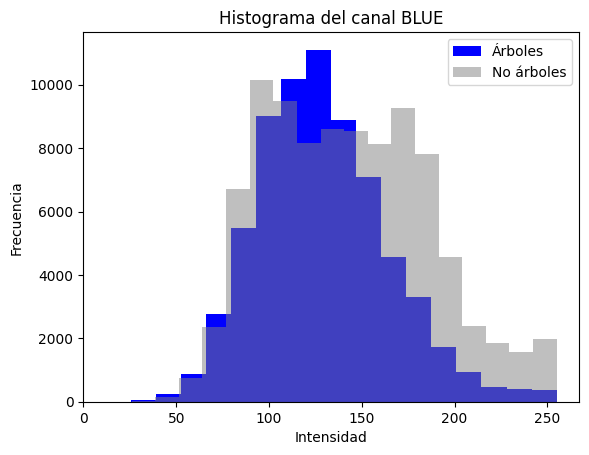

In [42]:
# Crear máscara con las cajas de árboles
mascara_arboles = np.zeros(img_array.shape[:2], dtype=np.uint8)
for _, row in df_arboles.iterrows():
    xmin, ymin, xmax, ymax = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
    mascara_arboles[ymin:ymax, xmin:xmax] = 1

pix_arbol = img_array[mascara_arboles == 1]
pix_no_arbol = img_array[mascara_arboles == 0]

# Graficar histogramas RGB
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.figure()
    # Sturges' Rule:  log2(n) + 1
    plt.hist(pix_arbol[:, i], bins="sturges", alpha=1, label='Árboles', color=color)
    plt.hist(pix_no_arbol[:, i], bins="sturges", alpha=0.5, label='No árboles', color='gray')
    plt.title(f"Histograma del canal {color.upper()}")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()


### Calcular la media RGB en cada árbol detectado

Para cada caja delimitadora, se calcula el promedio de los valores de los canales R, G y B.  
Estas medias se integran al DataFrame `df_arboles`, proporcionando una representación espectral promedio por árbol.  
Finalmente, se guarda el resultado en un archivo CSV para su análisis posterior.


In [57]:
mean_rgb = []
# Calcular la media RGB en cada caja
for _, row in df_arboles.iterrows():
    xmin, ymin, xmax, ymax = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
    region = img_array[ymin:ymax, xmin:xmax]
    R_mean = region[:, :, 0].mean()
    G_mean = region[:, :, 1].mean()
    B_mean = region[:, :, 2].mean()
    mean_rgb.append([R_mean, G_mean, B_mean])
# Convertir a DataFrame y unir con df_arboles
df_rgb = pd.DataFrame(mean_rgb, columns=["R", "G", "B"])
df_arboles = pd.concat([df_arboles, df_rgb], axis=1)
# Ver resultado
df_arboles.to_csv("df_arboles.csv", index=False)
df_arboles.head()

,id_arbol,xmin,ymin,xmax,ymax,area_px,ExG_mean,VARI_mean,R_mean,G_mean,B_mean,R,G,B,R,G,B,R,G,B
0,1,330.0,342.0,373.0,391.0,2107.0,77.225725,536114.340275,154.977693,169.006645,125.853821,154.977693,169.006645,125.853821,154.977693,169.006645,125.853821,154.977693,169.006645,125.853821
1,2,216.0,206.0,248.0,242.0,1152.0,77.225725,536114.340275,151.463542,157.031250,123.578125,151.463542,157.031250,123.578125,151.463542,157.031250,123.578125,151.463542,157.031250,123.578125
2,3,325.0,44.0,363.0,82.0,1444.0,77.225725,536114.340275,146.706371,161.033241,115.914127,146.706371,161.033241,115.914127,146.706371,161.033241,115.914127,146.706371,161.033241,115.914127
3,4,261.0,238.0,296.0,276.0,1330.0,77.225725,536114.340275,180.204511,188.522556,144.969925,180.204511,188.522556,144.969925,180.204511,188.522556,144.969925,180.204511,188.522556,144.969925
4,5,173.0,0.0,229.0,33.0,1848.0,77.225725,536114.340275,170.638528,181.005411,125.125541,170.638528,181.005411,125.125541,170.638528,181.005411,125.125541,170.638528,181.005411,125.125541


### Calcular la media RGB en regiones que no contienen árboles

Se crea una máscara lógica para identificar todos los píxeles que están fuera de las cajas delimitadoras de árboles.  
Luego, se calcula el promedio de los valores de cada canal RGB en estas regiones de fondo.  


In [55]:
# Calcular media RGB de píxeles fuera de las cajas (no árboles)
mask = np.zeros((img_array.shape[0], img_array.shape[1]), dtype=bool)
for _, row in df_arboles.iterrows():
    xmin, ymin, xmax, ymax = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
    mask[ymin:ymax, xmin:xmax] = True
non_tree_mask = ~mask

R_non = R[non_tree_mask]
G_non = G[non_tree_mask]
B_non = B[non_tree_mask]

df_non_tree = pd.DataFrame({
    "R": R_non,
    "G": G_non,
    "B": B_non
})
# Calcular el promedio en los píxeles que no son árboles
R_mean_non_tree = R[non_tree_mask].mean()
G_mean_non_tree = G[non_tree_mask].mean()
B_mean_non_tree = B[non_tree_mask].mean()
# Mostrar resultados
print(f"Promedio RGB fuera de árboles:")
print(f"R: {R_mean_non_tree:.2f}, G: {G_mean_non_tree:.2f}, B: {B_mean_non_tree:.2f}")

Promedio RGB fuera de árboles:
R: 155.43, G: 155.67, B: 142.77


### Graficar combinaciones de canales RGB: árboles vs no árboles

Se define una función para generar gráficos de dispersión comparando combinaciones de canales (R vs G, G vs B, R vs B).  
Cada gráfico muestra cómo se distribuyen los valores promedio RGB de los árboles en contraste con los píxeles que no pertenecen a árboles.


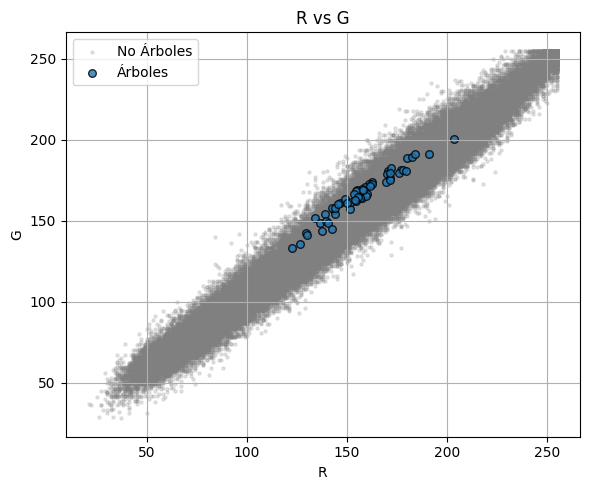

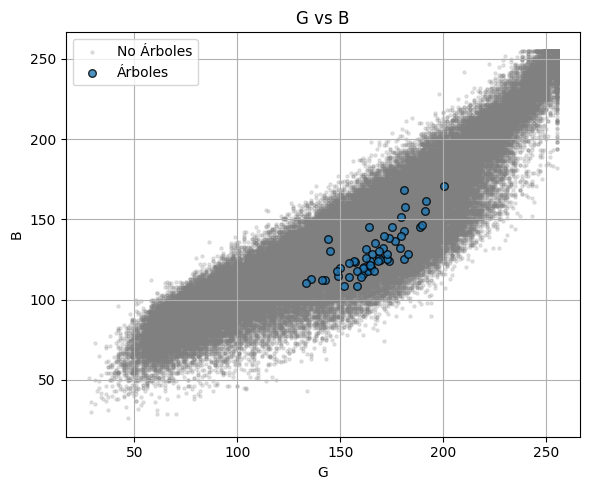

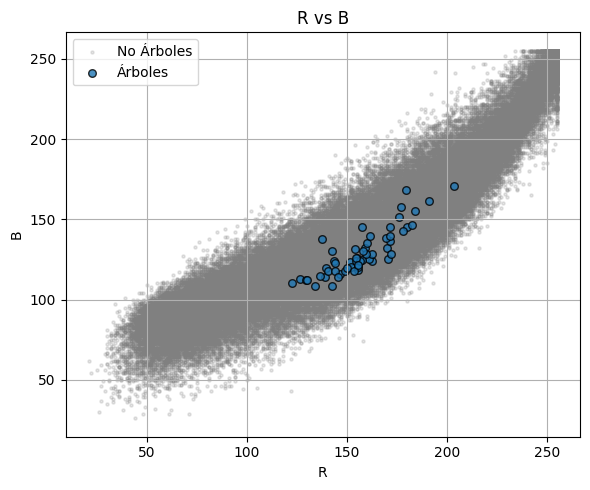

In [50]:
# Función para graficar combinaciones
def scatter_rgb(df1, df2, x, y, label1='Árboles', label2='No Árboles'):
    plt.figure(figsize=(6, 5))
    plt.scatter(df2[x], df2[y], alpha=0.2, label=label2, s=5, color='gray')
    plt.scatter(df1[x], df1[y], alpha=0.8, label=label1, s=30, edgecolors='black')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs {y}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Graficar combinaciones
scatter_rgb(df_rgb, df_non_tree, "R", "G")
scatter_rgb(df_rgb, df_non_tree, "G", "B")
scatter_rgb(df_rgb, df_non_tree, "R", "B")
